## Part III: What makes a property attractive?

Can you suggest to your friends what other people are looking for when using the services of Airbnb in Boston? 
It might help them make a better choice…

We use feature `availability_30` as a proxy for the attractiveness of a property. 
This feature represents the number of days a property is available in next 30 days. 
In this analysis, we consider less available properties to be more attractive.

In [3]:
# Read necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Read data
df = pd.read_csv('data/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
# Drop the rows with missing response values
df = df.dropna(subset = ['price'], axis = 0)

In [6]:
# Drop columns with all NaN values
df = df.dropna(how = 'all', axis = 1)

In the figures below, you can see that the analysis with respect to neighbourhood suggests the most attractive properties to be located in Financial District.
Villas are the most attractive type of property, while private room dominates with respect to the type of room. 
If the host of a property is a super-host and/or has a profile picture, the attractiveness of the property raises.

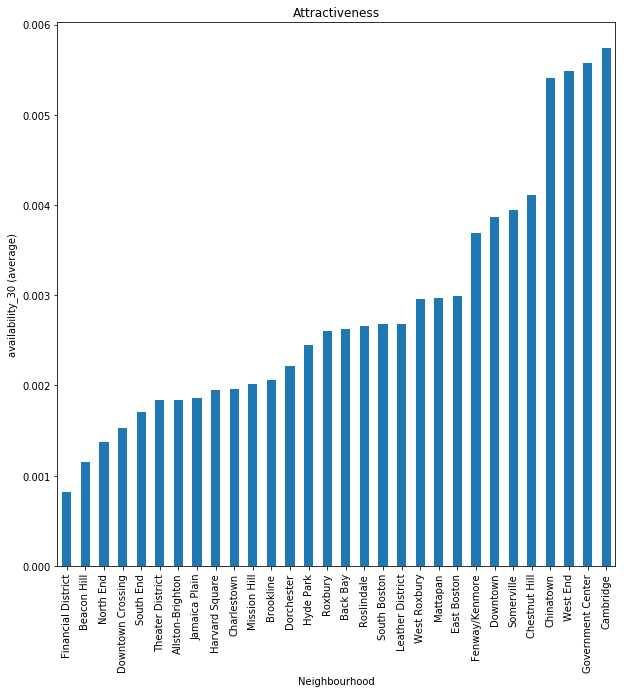

In [7]:
# How does the neighbourhood affect the attractiveness?
values = df.groupby('neighbourhood').availability_30.mean().sort_values()
plt.figure(figsize=(10,10))
(values/df.shape[0]).plot(kind="bar");
plt.title("Attractiveness");
plt.ylabel('availability_30 (average)');
plt.xlabel('Neighbourhood');

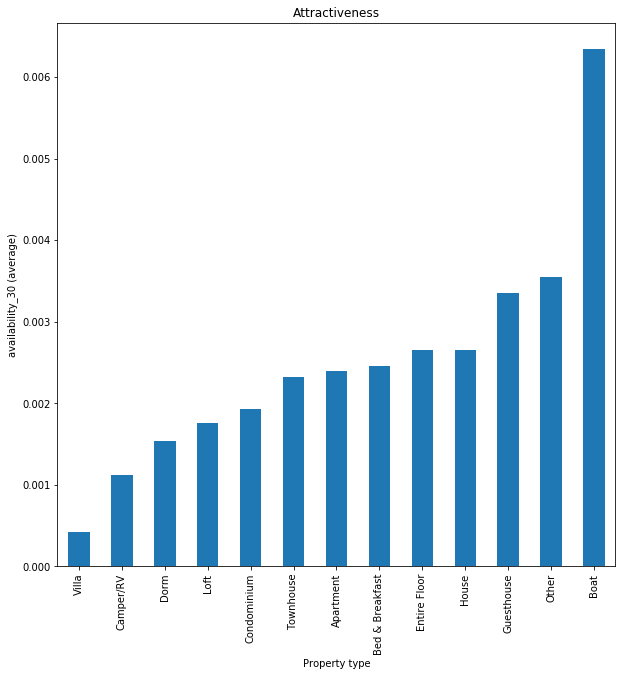

In [8]:
# How does the property_type affect the attractiveness?
values = df.groupby('property_type').availability_30.mean().sort_values()
plt.figure(figsize=(10,10))
(values/df.shape[0]).plot(kind="bar");
plt.title("Attractiveness");
plt.ylabel('availability_30 (average)');
plt.xlabel('Property type');

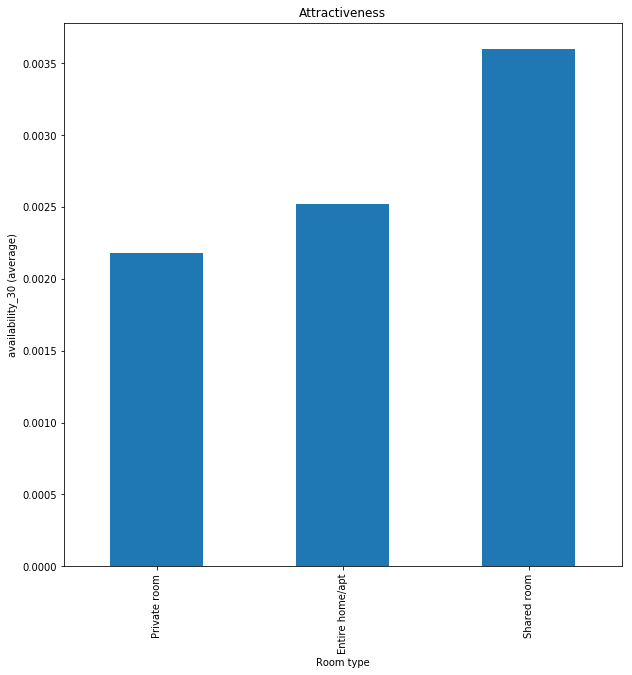

In [9]:
# How does the room_type affect the attractiveness?
values = df.groupby('room_type').availability_30.mean().sort_values()
plt.figure(figsize=(10,10))
(values/df.shape[0]).plot(kind="bar");
plt.title("Attractiveness");
plt.ylabel('availability_30 (average)');
plt.xlabel('Room type');

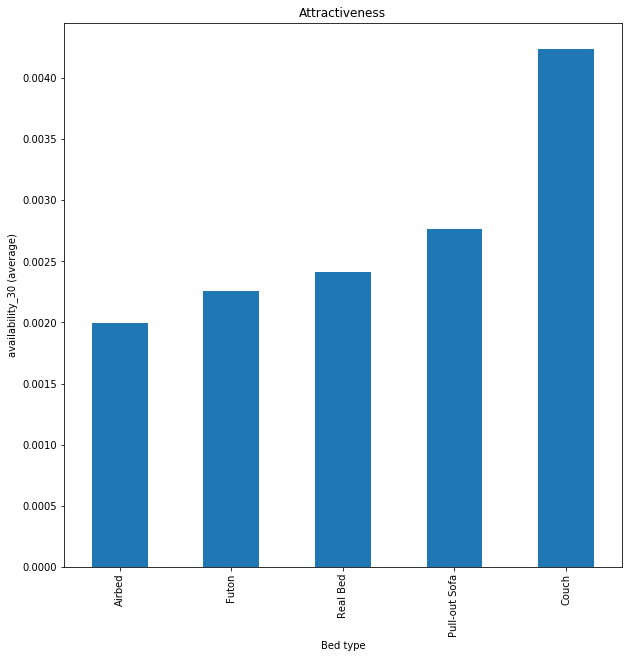

In [10]:
# How does the bed_type affect the attractiveness?
values = df.groupby('bed_type').availability_30.mean().sort_values()
plt.figure(figsize=(10,10))
(values/df.shape[0]).plot(kind="bar");
plt.title("Attractiveness");
plt.ylabel('availability_30 (average)');
plt.xlabel('Bed type');

In [11]:
df.groupby(['neighbourhood','property_type', 'room_type']).availability_30.mean().sort_values().head()

neighbourhood   property_type  room_type      
Hyde Park       House          Entire home/apt    0.0
Brookline       Condominium    Private room       0.0
Roslindale      Condominium    Entire home/apt    0.0
North End       Loft           Entire home/apt    0.0
Fenway/Kenmore  House          Entire home/apt    0.0
Name: availability_30, dtype: float64

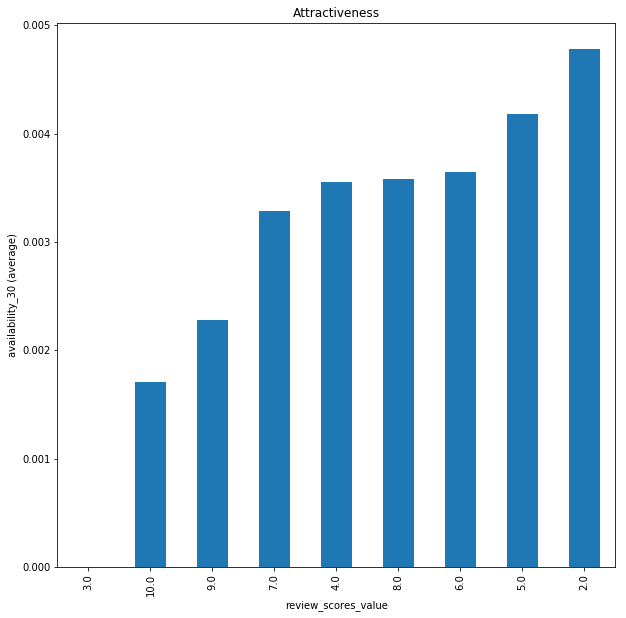

In [12]:
# How does the review_scores_value affect the attractiveness?
values = df.groupby('review_scores_value').availability_30.mean().sort_values()
plt.figure(figsize=(10,10))
(values/df.shape[0]).plot(kind="bar");
plt.title("Attractiveness");
plt.ylabel('availability_30 (average)');
plt.xlabel('review_scores_value');

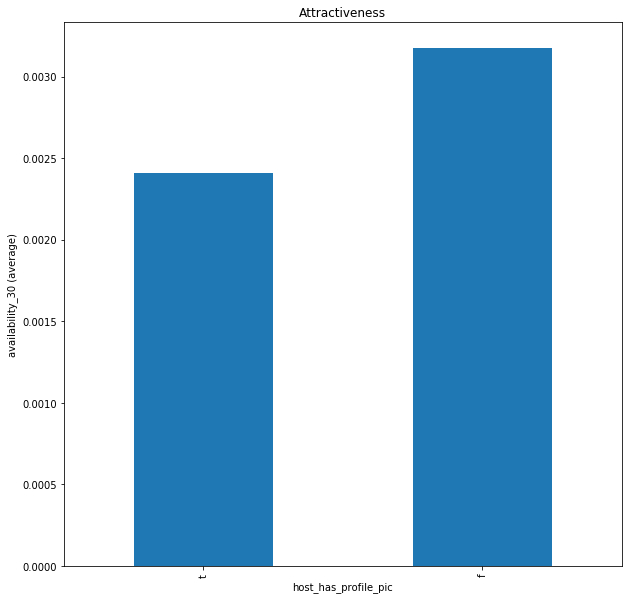

In [13]:
# How does the host_has_profile_pic affect the attractiveness?
values = df.groupby('host_has_profile_pic').availability_30.mean().sort_values()
plt.figure(figsize=(10,10))
(values/df.shape[0]).plot(kind="bar");
plt.title("Attractiveness");
plt.ylabel('availability_30 (average)');
plt.xlabel('host_has_profile_pic');

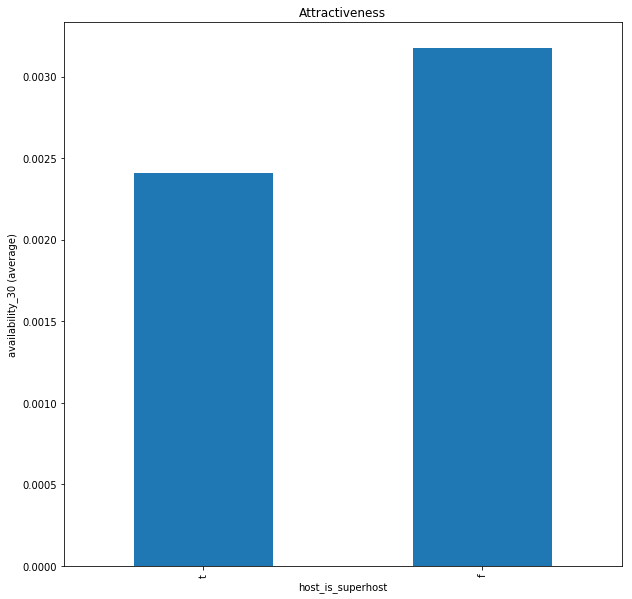

In [14]:
# How does the host_is_superhost affect the attractiveness?
df.groupby('host_is_superhost').availability_30.mean().sort_values()
plt.figure(figsize=(10,10))
(values/df.shape[0]).plot(kind="bar");
plt.title("Attractiveness");
plt.ylabel('availability_30 (average)');
plt.xlabel('host_is_superhost');